# <center>**Bioseñales y sistemas**
## <center>**Proyecto procesamiento de señales EMG**
## <center>**Seguimiento 1**
#### Maria Alejandra Escobar - C.C 1004425012
#### Juan Manuel Martínez - C.C 1007739919


## INFORME

### Electromiografía
La electromiografía (EMG) es una técnica que permite registrar la actividad eléctrica generada por los músculos durante su contracción y relajación. Esta señal eléctrica se conoce como señal electromiográfica y presenta características específicas que la diferencian de otras señales bioeléctricas. Las principales características de una señal electromiografía son:

**Amplitud:** La amplitud de la señal EMG oscila típicamente entre 0 y 10 mV, dependiendo de la fuerza de contracción muscular y la distancia entre los electrodos y las fibras musculares activas.

**Frecuencia:** El rango de frecuencias de la señal EMG se encuentra típicamente entre 20 y 500 Hz, con la mayor parte de la energía concentrada entre 50 y 150 Hz.

**Naturaleza estocástica:** La señal EMG es una señal aleatoria y no periódica, ya que representa la suma de los potenciales de acción de las unidades motoras activas en un músculo.
Dependencia de la fuerza: La amplitud y la frecuencia de la señal EMG aumentan con la fuerza de contracción muscular.

**Interferencia:** La señal EMG puede verse afectada por ruido e interferencias de fuentes externas, como otros dispositivos eléctricos o la actividad de otros músculos cercanos [1].

### Operador TKEO
El operador de TKEO (Teager-Kaiser Energy Operator) es una herramienta ampliamente utilizada en el análisis de señales bioeléctricas, como la señal electromiográfica. El operador de TKEO es un operador no lineal que proporciona una estimación de la energía instantánea de una señal [2].

En el caso de la señal electromiográfica, el operador de TKEO resalta las componentes de alta frecuencia y amplitud de la señal. La interpretación de los valores del operador de TKEO se basa en la idea de que valores altos indican una mayor actividad muscular en ese instante de tiempo. Por lo tanto, los picos y las áreas con valores elevados del operador de TKEO pueden utilizarse para detectar y analizar las contracciones musculares en la señal electromiográfica.

**[1]** Merletti, R., & Parker, P. J. (Eds.). (2004). Electromyography: physiology, engineering, and non-invasive applications (Vol. 11). John Wiley & Sons.

**[2]** Solnik, S., Rider, P., Steinweg, K., DeVita, P., & Hortobágyi, T. (2010). Teager–Kaiser energy operator signal conditioning improves EMG onset detection. European journal of applied physiology, 110, 489-498.

In [3]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Punto 0 
Vamos motivados, esto está fácil

In [4]:
import os
import glob
ruta_p = 'EMG_data_for_gestures-master'
i = 0
diccionario_3d = {} 
for carpeta in os.listdir(ruta_p):
    i+=1
    carpeta_path = os.path.join(ruta_p, carpeta)
    archivos = glob.glob(os.path.join(carpeta_path, '*'))
    if len(archivos)>0:
        primer_archivo = archivos[0]
        df = pd.read_csv(primer_archivo, delimiter="\t")
        diccionario_3d[i] = df

## Punto 1
Funcion que aplica TKEO a un solo canal

In [5]:
def tkeo(a):
	a = np.array(a)
	i = a[1:-1]*a[1:-1]
	j = a[2:]*a[:-2]
	aTkeo = i-j
	return aTkeo

## Punto 2 
Funcion que aplica TKEO a multiples canales 

In [6]:
def tkeo_multiple(n_canal,df):
    res_canales = np.zeros((len(df)-2, n_canal))
    canales = ['channel1', 'channel2', 'channel3','channel4','channel5','channel6','channel7','channel8']
    for i in np.arange(1,n_canal+1):
        arreglo = np.array(df[f'channel{i}'])
        ar_tkeo = tkeo(arreglo)
        res_canales[:, i-1] = ar_tkeo
    df_tkeo = pd.DataFrame(res_canales, columns=canales)
    return df_tkeo

## Punto 3 
Calcular las variables estadisticas del diccionario sin TKEO

In [7]:
def calcularRMS(X):
  N=X.size #Cantidad de puntos
  rms=(np.sum(X**(2))/N)**0.5
  return rms

In [8]:
def var_est(n_canal, df):
    res_canales_list = []
    estadisticas = ['class','C_1RMS', 'C_1Var', 'C_1MAV', 'C_1MAVS', 'C_1SSC', 'C_1WL', 'C_1ZC',
                    'C_2RMS', 'C_2Var', 'C_2MAV', 'C_2MAVS', 'C_2SSC', 'C_2WL', 'C_2ZC',
                    'C_3RMS', 'C_3Var', 'C_3MAV', 'C_3MAVS', 'C_3SSC', 'C_3WL', 'C_3ZC',
                    'C_4RMS', 'C_4Var', 'C_4MAV', 'C_4MAVS', 'C_4SSC', 'C_4WL', 'C_4ZC',
                    'C_5RMS', 'C_5Var', 'C_5MAV', 'C_5MAVS', 'C_5SSC', 'C_5WL', 'C_5ZC',
                    'C_6RMS', 'C_6Var', 'C_6MAV', 'C_6MAVS', 'C_6SSC', 'C_6WL', 'C_6ZC',
                    'C_7RMS', 'C_7Var', 'C_7MAV', 'C_7MAVS', 'C_7SSC', 'C_7WL', 'C_7ZC',
                    'C_8RMS', 'C_8Var', 'C_8MAV', 'C_8MAVS', 'C_8SSC', 'C_8WL', 'C_8ZC']
    clase = []
    for i in range(8):
        clase = [i]
        lista_move = [] 
        df_p1 = df[df['class'] == i] 
        for j in range(1, n_canal + 1):
            arreglo = np.array(df_p1[f'channel{j}'])
            rms = calcularRMS(arreglo)
            var = np.var(arreglo)
            mean = np.mean(np.abs(arreglo))
            mean_slope = np.mean(np.abs(np.diff(arreglo)))
            sl_sign_c = np.sum(np.abs(np.diff(np.sign(np.diff(arreglo)))))
            wl_values = np.sum(np.abs(np.diff(arreglo)))
            zero_crossings = np.sum(np.diff(np.sign(arreglo)))
            lista = [rms, var, mean, mean_slope, sl_sign_c, wl_values, zero_crossings]
            lista_move.extend(lista)
        
        clase.extend(lista_move)        
        res_canales_list.append(clase)
        
    df_estadisticas = pd.DataFrame(res_canales_list, columns=estadisticas)
    return df_estadisticas

## Punto 4
Se modifico la funcion anterior para aplicar la transformacion TKEO en la funcion y obtener las variables estadisticas habiendo aplicado la transformacion TKEO

In [9]:
def var_est_con_TKEO(n_canal, df):
    res_canales_list = []
    estadisticas = ['class','C_1RMS', 'C_1Var', 'C_1MAV', 'C_1MAVS', 'C_1SSC', 'C_1WL', 'C_1ZC',
                    'C_2RMS', 'C_2Var', 'C_2MAV', 'C_2MAVS', 'C_2SSC', 'C_2WL', 'C_2ZC',
                    'C_3RMS', 'C_3Var', 'C_3MAV', 'C_3MAVS', 'C_3SSC', 'C_3WL', 'C_3ZC',
                    'C_4RMS', 'C_4Var', 'C_4MAV', 'C_4MAVS', 'C_4SSC', 'C_4WL', 'C_4ZC',
                    'C_5RMS', 'C_5Var', 'C_5MAV', 'C_5MAVS', 'C_5SSC', 'C_5WL', 'C_5ZC',
                    'C_6RMS', 'C_6Var', 'C_6MAV', 'C_6MAVS', 'C_6SSC', 'C_6WL', 'C_6ZC',
                    'C_7RMS', 'C_7Var', 'C_7MAV', 'C_7MAVS', 'C_7SSC', 'C_7WL', 'C_7ZC',
                    'C_8RMS', 'C_8Var', 'C_8MAV', 'C_8MAVS', 'C_8SSC', 'C_8WL', 'C_8ZC']
    clase = []
    for i in range(8):
        clase = [i]
        lista_move = [] 
        df_p1 = df[df['class'] == i] 
        if len(df_p1>0):
            df_p1 = tkeo_multiple(8,df_p1)
        for j in range(1, n_canal + 1):
            arreglo = np.array(df_p1[f'channel{j}'])
            rms = calcularRMS(arreglo)
            var = np.var(arreglo)
            mean = np.mean(np.abs(arreglo))
            mean_slope = np.mean(np.abs(np.diff(arreglo)))
            sl_sign_c = np.sum(np.abs(np.diff(np.sign(np.diff(arreglo)))))
            wl_values = np.sum(np.abs(np.diff(arreglo)))
            zero_crossings = np.sum(np.diff(np.sign(arreglo)))
            lista = [rms, var, mean, mean_slope, sl_sign_c, wl_values, zero_crossings]
            lista_move.extend(lista)
        
        clase.extend(lista_move)        
        res_canales_list.append(clase)
        
    df_estadisticas = pd.DataFrame(res_canales_list, columns=estadisticas)
    return df_estadisticas

Vamos a hacer un diccionario donde la clave sea el paciente y el valor sea un DF que incluya los 8 canales de cada paciente aplicando el TKEO.

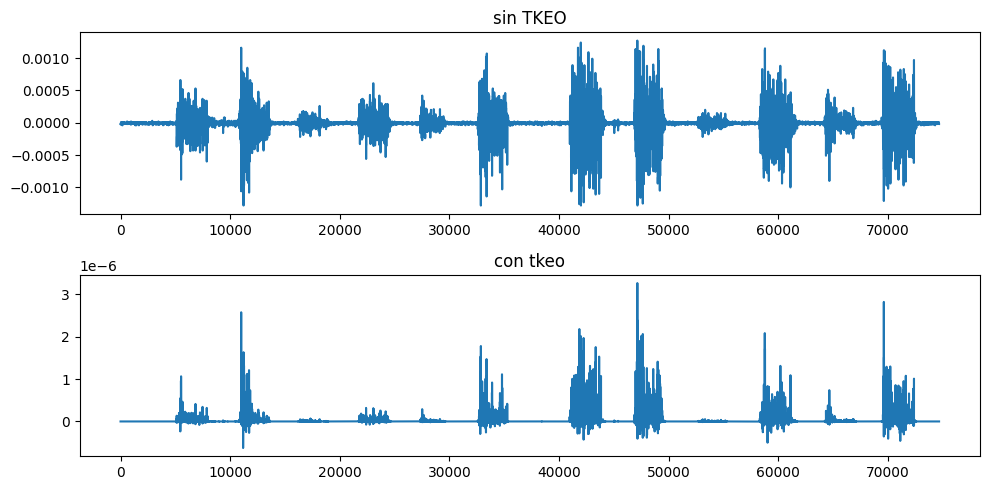

In [17]:
diccionario_Tkeo = {}
i = 0
for pac in diccionario_3d.values():
    i+=1
    diccionario_Tkeo[f'P{i}'] = tkeo_multiple(8,pac)

t = np.arange(0,len(diccionario_3d[11]['channel1']))
t_tkeo = np.arange(0,len(diccionario_Tkeo['P11']['channel1']))
ejemplo_comp_Tkeo = plt.figure(figsize=(10, 5))
    
plt.subplot(2, 1, 1)
plt.plot(t, diccionario_3d[11]['channel1'])
plt.title('sin TKEO')

plt.subplot(2, 1, 2)
plt.plot(t_tkeo, diccionario_Tkeo['P11']['channel1'])
plt.title('con tkeo')

plt.tight_layout()

In [30]:
i = 0
df_final_conTkeo = pd.DataFrame()
for pac in diccionario_3d.values():
    i+=1
    df_np = pd.DataFrame({'Sujeto': (np.ones(8, dtype=int))* i,'class': np.arange(0, 8)})   
    df_tkeo = pd.DataFrame({'Tkeo': np.ones(8, dtype=int),'class': np.arange(0, 8)}) 
    df_final = var_est_con_TKEO(8,pac)
    
    df_final = pd.merge(df_np, df_final, how = 'left', on = 'class')
    df_final = pd.merge(df_final, df_tkeo, how = 'left', on = 'class')
    
    #df_final.append(df_final_Tkeo)
    df_final_conTkeo = pd.concat([df_final_conTkeo,df_final],axis=0)
    df_final_conTkeo = df_final_conTkeo.fillna(0)

C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_24004\2966749409.py:3: RuntimeWarning: invalid value encountered in scalar divide
  rms=(np.sum(X**(2))/N)**0.5
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / r

## Punto 5
DataFrame sin Tkeo

In [31]:
i = 0
df_final_sinTkeo = pd.DataFrame()
for pac in diccionario_3d.values():
    i+=1
    df_np = pd.DataFrame({'Sujeto': (np.ones(8, dtype=int))* i,'class': np.arange(0, 8)})   
    df_tkeo = pd.DataFrame({'Tkeo': np.zeros(8, dtype=int),'class': np.arange(0, 8)}) 
    df_final = var_est(8,pac)
    df_final = pd.merge(df_np, df_final, how = 'left', on = 'class')
    df_final = pd.merge(df_final, df_tkeo, how = 'left', on = 'class')
    
    #df_final.append(df_final_Tkeo)
    df_final_sinTkeo = pd.concat([df_final_sinTkeo,df_final],axis=0)
    df_final_sinTkeo = df_final_sinTkeo.fillna(0)

C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_24004\2966749409.py:3: RuntimeWarning: invalid value encountered in scalar divide
  rms=(np.sum(X**(2))/N)**0.5
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / r

## Punto 6 
DataFrame final final, soltame hp

In [32]:
df_completo = pd.concat([df_final_sinTkeo,df_final_conTkeo],axis=0)


df_completo

,Sujeto,class,C_1RMS,C_1Var,C_1MAV,C_1MAVS,C_1SSC,C_1WL,C_1ZC,C_2RMS,...,C_7WL,C_7ZC,C_8RMS,C_8Var,C_8MAV,C_8MAVS,C_8SSC,C_8WL,C_8ZC,Tkeo
0,1,0,1.377077e-04,1.892634e-08,6.183127e-05,9.694459e-06,7234.0,0.400100,-2.0,1.291164e-04,...,0.404770,-1.0,1.450801e-04,2.101997e-08,6.680704e-05,1.028640e-05,7136.0,0.424530,0.0,0
1,1,1,1.700840e-05,2.018286e-10,1.269577e-05,1.526859e-06,570.0,0.005770,0.0,2.842795e-05,...,0.005010,1.0,1.445299e-05,1.289331e-10,1.123810e-05,1.320455e-06,563.0,0.004990,-1.0,0
2,1,2,2.230812e-04,4.963748e-08,1.715007e-04,2.699205e-05,657.0,0.095120,0.0,1.145002e-04,...,0.087070,0.0,1.588650e-04,2.516906e-08,1.214270e-04,1.840806e-05,639.0,0.064870,0.0,0
3,1,3,1.847610e-04,3.382781e-08,1.405503e-04,1.931586e-05,668.0,0.073690,2.0,2.265797e-04,...,0.030850,0.0,1.596455e-04,2.533018e-08,1.253931e-04,1.691743e-05,656.0,0.064540,2.0,0
4,1,4,5.179992e-05,2.604975e-09,3.980238e-05,5.665698e-06,612.0,0.019490,0.0,8.386064e-05,...,0.042680,0.0,7.332395e-05,5.244896e-09,5.623365e-05,7.906977e-06,616.0,0.027200,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,36,3,3.769563e-08,1.370799e-15,8.201657e-09,1.216178e-08,1127.0,0.000037,1.0,1.175364e-08,...,0.000007,1.0,6.609162e-09,4.178659e-17,1.560136e-09,2.191518e-09,1107.0,0.000007,1.0,1
4,36,4,1.852621e-09,3.293449e-18,4.318598e-10,6.233733e-10,1149.0,0.000002,0.0,2.767671e-09,...,0.000005,0.0,1.906538e-09,3.457117e-18,4.785917e-10,7.029690e-10,1157.0,0.000002,0.0,1
5,36,5,2.280261e-08,4.974427e-16,5.432824e-09,7.918550e-09,1076.0,0.000022,0.0,2.196109e-08,...,0.000001,0.0,1.254977e-09,1.517179e-18,2.860036e-10,4.316986e-10,998.0,0.000001,0.0,1
6,36,6,1.185381e-08,1.355347e-16,2.518608e-09,3.758293e-09,1106.0,0.000011,-1.0,3.691752e-09,...,0.000010,-1.0,1.846080e-08,3.279815e-16,3.996677e-09,5.762141e-09,1118.0,0.000016,-1.0,1


In [39]:
RMS_xcanal_sintkeo = []
df_final_sinTkeo_cl1 = df_final_sinTkeo[df_final_sinTkeo['class']==1]
for i in np.arange(1,9):
    lista_RMS = list(df_final_sinTkeo_cl1[f'C_{i}RMS'])
    RMS_xcanal_sintkeo.append(lista_RMS)
    holq 

len(RMS_xcanal_sintkeo[1])

36

In [ ]:
canales = ['PE_C3', 'PE_C1', 'PE_CZ', 'PE_C2', 'PE_C4', 'PE_O1', 'PE_OZ', 'PE_O2']
labels_plot=['C3', 'C1', 'CZ', 'C2', 'C4', 'O1', 'OZ', 'O2']

datos_control = df_control[canales].values
datos_parkinson = df_parkinson[canales].values

datos_intercalados = []
etiquetas_intercaladas = []

for i, canal in enumerate(canales):
    datos_intercalados.extend([datos_control[:, i], datos_parkinson[:, i]])
    etiquetas_intercaladas.extend([f'{labels_plot[i]} Control', f'{labels_plot[i]} Parkinson'])

posiciones = np.arange(1, len(canales) * 2 + 1)

fig1_boxplot = plt.figure(figsize=(10, 4.5))
plt.boxplot(datos_intercalados, positions=posiciones, labels=etiquetas_intercaladas)
plt.title('Diagrama de caja y bigotes de la entropía de permutación por canal (Control y Parkinson)')
plt.xticks(rotation=45)
plt.tight_layout()